# Recommendation Systems


## Type of Recommendation Engines

- Case 1: Recommeding the most popular item
- Case 2: Building a Classifier 
- Case 3: Recommendation Algorithms
        A. Content Filtering
        B. Collaborative Filtering

<img src="images/collaborative_vs_content_filtering.png"  style ="width:600px; height:400px/">

## The DataSet

To experiment with recommendation algorithms, we’ll need data that contains a set of **items** and a set of **users** who have reacted to some of the items.

The reaction can be:
 - Explicit (rating on a scale of 1 to 5, likes or dislikes)
 - Implicit (viewing an item, adding it to a wish list, the time spent on an article).

<img src="images/dataview.png" style ="width:400px; height:200px/">

## Steps Involved in Collaborative Filtering
### Questions that need to be answered
 - How do you determine which users or items are similar to one another?
 - Given that you know which users are similar, how do you determine the rating that a user would give to an item based on the ratings of similar users?
 - How do you measure the accuracy of the ratings you calculate?
 
 The First two questions have multiple answers - depending on the kind of algorithm you choose.  
 The third question too has multiple answers which include a lot of error calculation techniques. One way is to use RMSE / MAE.
 
### Two Major Collaborative Filtering Techniques
### Memory Based
The first category includes algorithms that are memory based, in which statistical techniques are applied to the entire dataset to calculate the predictions.

To find the rating **R** that a user **U** would give to an item I, the approach includes:
 - Finding users similar to U who have rated the item I
 - Calculating the rating R based the ratings of users found in the previous step

#### How to Find Similar Users on the Basis of Ratings
To understand the concept of similarity, let’s create a simple dataset first.

The data includes four users A, B, C, and D, who have rated two movies. The ratings are stored in lists, and each list contains two numbers indicating the rating of each movie:

- Ratings by A are [1.0, 2.0].
- Ratings by B are [2.0, 4.0].
- Ratings by C are [2.5, 4.0].
- Ratings by D are [4.5, 5.0].

<img src="images/sample_ratings.png" style ="width:400px; height:200px/">

In [78]:
from scipy.spatial.distance import euclidean

a = [1, 2]
b = [2, 4]
c = [2.5, 4]
d = [4.5, 5]

print('Distance between C and A: ',euclidean(c, a))
print('Distance between C and B: ',euclidean(c, b))
print('Distance between C and D: ',euclidean(c, d))
print('Also: ')
print('Distance between A and B: ',euclidean(a, b))

Distance between C and A:  2.5
Distance between C and B:  0.5
Distance between C and D:  2.23606797749979
Also
Distance between A and B:  2.23606797749979


#### Who is C most closer to besides B?

#### What else can we use instead of Euclidean Distance? 

<img src="images/cosine_vs_euclidean.png" style ="width:400px; height:200px/">

To calculate similarity using angle, we need a function that returns 
- higher similarity for a lower angle 
- lower similarity for a higher angle

#### Cosine Similarity !!!
The cosine of an angle is a function that decreases from 1 to -1 as the angle increases from 0 to 180.

In [2]:
from scipy.spatial.distance import cosine
print('Cosine Distance between C and A: ',cosine(c, a))
print('Cosine Distance between C and B: ',cosine(c, b))
print('Cosine Distance between C and D: ',cosine(c, d))

print('Also: ')
print('Cosine Distance between A and B: ',cosine(a, b))

Cosine Distance between C and A:  0.004504527406047898
Cosine Distance between C and B:  0.004504527406047898
Cosine Distance between C and D:  0.015137225946083022
Also: 
Cosine Distance between A and B:  0.0


#### How to Calculate the Ratings

 - Average Rating of top 10 similar users
 <img src="images/avg_rating_formula.png" style ="width:150px; height:50px/" >
 - Weighted Average 
 <img src="images/weighted_rating_formula.png" style ="width:200px; height:50px/">
 
#### User-Based vs Item-Based Collaborative Filtering
 - **User-based**: The technique in the examples explained above, where the rating matrix is used to find similar users based on the ratings they give, is called user-based or user-user collaborative filtering


 - **Item-based**: If you use the rating matrix to find similar items based on the ratings given to them by users, then the approach is called item-based or item-item collaborative filtering.
 
<img src="images/user_vs_item.jpeg"  style ="width:600px; height:300px/">
 


### Model Based

In this approach, CF models are developed using machine learning algorithms to predict a user’s rating of unrated items. Some of these models/techniques include: 
- k-nearest neighbors
- clustering
- matrix factorization 
- deep learning models like autoencoders and using techniques like embeddings as low-dimensional hidden factors for items and users.

<img src="images/model_based.png"  style ="width:600px; height:400px/">

### Dimensionality Reduction

In the user-item matrix, there are two dimensions:
 - The number of users
 - The number of items
 
If the matrix is mostly empty, reducing dimensions can improve the performance of the algorithm in terms of both space and time. 

Matrix factorization can be seen as breaking down a large matrix into a product of smaller ones. This is similar to the factorization of integers, where 12 can be written as 6 x 2 or 4 x 3. In the case of matrices, a matrix A with dimensions m x n can be reduced to a product of two matrices X and Y with dimensions m x p and p x n respectively.

The reduced matrices actually represent the users and items individually. The m rows in the first matrix represent the m users, and the p columns tell you about the features or characteristics of the users. The same goes for the item matrix with n items and p characteristics. Here’s an example of how matrix factorization looks:

<img src="images/dimension_reduction.png"  style ="width:600px; height:400px/">

In the image above, the matrix is reduced into two matrices. The one on the left is the user matrix with m users, and the one on top is the item matrix with n items. The rating 4 is reduced or factorized into:

 - A user vector (2, -1)
 - An item vector (2.5, 1)
 
The two columns in the user matrix and the two rows in the item matrix are called latent factors and are an indication of hidden characteristics about the users or the items. A possible interpretation of the factorization could look like this:

 - Assume that in a user vector (u, v), u represents how much a user likes the Horror genre, and v represents how much they like the Romance genre.

 - The user vector (2, -1) thus represents a user who likes horror movies and rates them positively and dislikes movies that have romance and rates them negatively.

 - Assume that in an item vector (i, j), i represents how much a movie belongs to the Horror genre, and j represents how much that movie belongs to the Romance genre.

 - The movie (2.5, 1) has a Horror rating of 2.5 and a Romance rating of 1. Multiplying it by the user vector using matrix multiplication rules gives you (2 * 2.5) + (-1 * 1) = 4.

So, the movie belonged to the Horror genre, and the user could have rated it 5, but the slight inclusion of Romance caused the final rating to drop to 4.


The number of latent factors affects the recommendations in a manner where the greater the number of factors, the more personalized the recommendations become. But too many factors can lead to overfitting in the model.

## Recommendation system with Python

### Reading the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sys
import pickle

In [34]:
# link to download: https://www.kaggle.com/grouplens/movielens-20m-dataset
path = 'Downloads/movielens-20m-dataset/'
movies = pd.read_csv(path + 'movie.csv')
tags = pd.read_csv(path + 'tag.csv')
ratings = pd.read_csv(path + 'rating.csv')

In [35]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [40]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [36]:
movies['genres'] = movies['genres'].str.replace('|',' ')

In [37]:
len(movies.movieId.unique())

27278

In [38]:
len(ratings.movieId.unique())

26744

In [8]:
#limit ratings to user ratings that have rated more that 55 movies -- 
#Otherwise it becomes impossible to pivot the rating dataframe later for collaborative filtering.

ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >= 55)

# list the movie titles that survive the filtering
movie_list_rating = ratings_f.movieId.unique().tolist()

In [79]:
# no worries: we have kept 97% of the original movie titles in ratings data frame
len(ratings_f.movieId.unique())/len(movies.movieId.unique()) * 100

97.85908057775497

In [10]:
# but only 57% of the users 
len(ratings_f.userId.unique())/len(ratings.userId.unique()) * 100

57.797867040211415

In [11]:
#filter the movies data frame
movies = movies[movies.movieId.isin(movie_list_rating)]

In [12]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance


In [13]:
# map movie to id:
Mapping_file = dict(zip(movies.title.tolist(), movies.movieId.tolist()))

In [14]:
tags.drop(['timestamp'],1, inplace=True)
ratings_f.drop(['timestamp'],1, inplace=True)

### Merge the movies and the tags data frame and create a metadata tag for each movie:

In [15]:
# create a mixed dataframe of movies title, genres 
# and all user tags given to each movie
mixed = pd.merge(movies, tags, on='movieId', how='left')
mixed.head(3)

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1644.0,Watched
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,computer animation
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Disney animated feature


In [16]:
# create metadata from tags and genres
mixed.fillna("", inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(
                                          lambda x: "%s" % ' '.join(x)))
Final = pd.merge(movies, mixed, on='movieId', how='left')
Final ['metadata'] = Final[['tag', 'genres']].apply(
                                          lambda x: ' '.join(x), axis = 1)
Final[['movieId','title','metadata']].head(3)

,movieId,title,metadata
0,1,Toy Story (1995),Watched computer animation Disney animated fea...
1,2,Jumanji (1995),time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),old people that is actually funny sequel fever...


In [48]:
Final.shape

(26694, 5)

In [87]:
Final.loc[1, "metadata"]

'time travel adapted from:book board game childhood recaptured game herds of CGI animals scary see also:Zathura time time travel board game fantasy Robin Williams scary time travel Robin Williams Joe Johnston Robin Williams kid flick jungle Robin Williams board game Robin Williams animals Lebbat Robin Williams time travel adventure Robin Williams Children Fantasy Robin Williams Dynamic CGI Action Kirsten Dunst Robin Williams Robin Williams fantasy kid flick animals animals fantasy For children fantasy adapted from:book childish Children kid flick time travel Joe Johnston fantasy Robin Williams time travel animals board game children fantasy Kirsten Dunst Robin Williams time travel board game time travel Children kid flick Filmed in BC fantasy Robin Williams animals bad cgi based on a book board game Chris Van Allsburg Robin Williams Robin Williams game magic board game monkey adapted from:book animals bad cgi based on a book board game childhood recaptured Children Chris Van Allsburg f

### Creating a content latent matrix from movie metadata:

### tf-idf vectors and truncated SVD :


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())
print(tfidf_df.shape)

(26694, 23704)


In [89]:
tfidf_df.shape

(26694, 23704)

In [91]:
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23694,23695,23696,23697,23698,23699,23700,23701,23702,23703
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### The first 200 components explain over 50% of the variance:

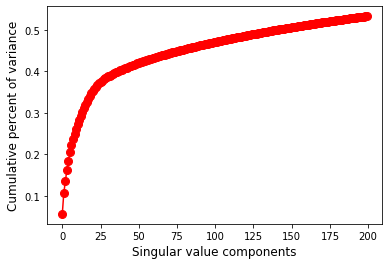

In [18]:
# Compress with SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [19]:
#number of latent dimensions to keep
n = 200 
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=Final.title.tolist())

In [20]:
# our content latent matrix:
latent_matrix.shape

(26694, 200)

### Creating a collaborative latent matrix from user ratings:

In [66]:
ratings_f.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [22]:
ratings_f1 = pd.merge(movies[['movieId']], ratings_f, on="movieId", how="right")

In [23]:
ratings_f2 = ratings_f1.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)

In [24]:
ratings_f2.head(3)

userId,1,2,3,5,7,8,11,13,14,16,...,138474,138475,138477,138483,138484,138486,138487,138490,138492,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,3.0,...,5.0,0.0,3.0,4.0,0.0,5.0,0.0,0.0,0.0,3.5
2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,4.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,4.0
3,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


In [67]:
ratings_f2.shape

(26694, 80046)

In [25]:
len(ratings_f.movieId.unique())

26694

In [26]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix_2 = svd.fit_transform(ratings_f2)
latent_matrix_2_df = pd.DataFrame(
                             latent_matrix_2,
                             index=Final.title.tolist())

In [68]:
latent_matrix_2_df.shape

(26694, 200)

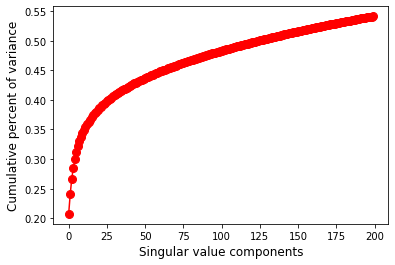

In [27]:
# plot variance expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [98]:
latent_matrix_1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),0.026804,0.052404,0.019479,0.003361,0.004004,-0.024907,0.115090,0.012749,-0.001627,0.103939,...,0.013765,-0.095055,0.071623,0.026548,0.145115,-0.046204,0.002641,0.075190,0.031707,-0.043084
Jumanji (1995),0.010512,0.010537,0.025846,0.000882,0.013254,-0.001140,0.068154,0.012675,0.006184,0.050531,...,0.013168,0.047116,0.023979,-0.002008,0.051804,0.008510,-0.011835,0.023738,0.037220,0.023813
Grumpier Old Men (1995),0.038827,0.073948,-0.004930,-0.001323,0.031760,0.002476,-0.003612,-0.001630,-0.000253,0.000645,...,-0.008554,0.011897,0.015156,-0.023353,-0.006564,-0.004556,0.015178,-0.011981,0.001144,0.002668
Waiting to Exhale (1995),0.136327,0.077169,-0.020606,-0.002103,0.101073,0.012071,-0.012106,-0.002062,-0.004896,-0.002583,...,0.039084,0.017345,0.032948,0.067761,0.047851,-0.115328,-0.002416,-0.006978,0.112730,0.032197
Father of the Bride Part II (1995),0.038644,0.084084,0.000456,0.000029,-0.013619,0.000075,0.013469,-0.000218,0.008462,0.013971,...,0.009855,-0.001510,0.006788,0.041731,0.038153,0.025821,0.055411,0.031643,0.008360,0.031986


In [99]:
latent_matrix_2_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),566.399546,-17.220076,136.259578,67.741281,45.164237,161.268919,-68.499228,69.552753,-59.055850,13.974031,...,25.707120,-12.796730,-18.754798,13.577070,9.082012,8.611207,-5.921727,-4.056060,-9.594410,10.341234
Jumanji (1995),255.369685,-16.704519,159.472499,-47.617594,-39.035040,12.521876,-66.950994,48.913895,20.515466,-24.841967,...,-3.825254,-24.587192,-14.663550,19.311788,-0.637451,9.361195,-0.465313,-12.819364,28.773395,-7.348377
Grumpier Old Men (1995),106.031137,-54.822451,65.715181,-44.950351,-30.607987,2.076419,-2.861147,1.221395,-23.294540,-27.719155,...,-1.839125,9.031219,-6.608052,-7.917692,3.340346,0.859752,1.655973,5.193916,2.932961,-10.376952
Waiting to Exhale (1995),26.135429,-29.596888,19.780741,-8.418184,-27.544151,2.002038,-0.067364,3.995107,-6.372644,3.986383,...,0.831253,-0.686659,2.086235,1.679287,0.557649,-0.564344,0.573190,0.465632,-2.327275,-2.342194
Father of the Bride Part II (1995),91.102740,-49.069112,73.892052,-39.855792,-48.151897,17.060574,-10.835706,9.440391,-15.996413,-17.218643,...,-3.516032,10.882131,-2.884915,-2.605068,1.501052,-0.860019,1.962073,9.454416,4.743658,-9.987913


### Running a content / collaborative and hybrid cosine Similarity:

In [102]:
from sklearn.metrics.pairwise import cosine_similarity
# take the latent vectors for a selected movie from both content 
# and collaborative matrixes
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc['Toy Story (1995)']).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaborative 
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies 
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
similar = pd.DataFrame(dictDf, index = latent_matrix_1_df.index )

#sort it on the basis of either: content, collaborative or hybrid, 
# here : content
similar.sort_values('hybrid', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Toy Story 2 (1999),0.963633,0.736437,0.850035
"Bug's Life, A (1998)",0.910092,0.640285,0.775189
"Monsters, Inc. (2001)",0.888226,0.613719,0.750973
Finding Nemo (2003),0.874042,0.591571,0.732807
"Incredibles, The (2004)",0.797007,0.565039,0.681023
Ice Age (2002),0.875240,0.479267,0.677254
Ratatouille (2007),0.903943,0.425328,0.664635
Antz (1998),0.740393,0.566646,0.653519
Toy Story 3 (2010),0.878544,0.407997,0.643271
Shrek (2001),0.639776,0.620458,0.630117


We could use the similarity information we gained from item-item collaborative filtering to compute a rating prediction,**𝑟[i][u]**, for an item (𝑖) by a user (𝑢) where the rating is missing. 
Namely by taking a weighted average on the rating values of the top K nearest neighbours of item (𝑖).

In [ ]:
surprise